In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

df_train = pd.read_csv('/lustrefs/disk/project/lt900202-ai24xb/processed_training_data.csv')
df_test = pd.read_csv('/lustrefs/disk/project/lt900202-ai24xb/processed_test_data.csv')
sp_sms = pd.read_csv('/lustrefs/disk/project/lt900202-ai24xb/sample_submission.csv')

In [2]:
df_train

,id,b1,b11,b12,b2,b3,b4,b5,b6,b7,...,savi,msavi,ndmi,rep,b8_b4,b8_b11,b4_b3,pc1,pc2,pc3
0,2002,293,1927,1038,278,475,453,987,1773,2184,...,0.922243,0.761531,-0.007055,719.761450,4.194260,0.985989,0.953684,-509.994736,216.490597,219.707658
1,3212,197,1598,697,201,347,228,682,1982,2449,...,1.224169,0.898826,0.170301,722.675000,9.885965,1.410513,0.657061,-498.261926,-343.391532,-28.137931
2,13312,929,1975,1031,982,1020,856,1220,2051,2421,...,0.709250,0.642092,0.095489,722.626354,2.794393,1.211139,0.839216,210.178719,1047.788355,-304.639176
3,17020,132,1560,689,189,408,175,609,2117,2907,...,1.335677,0.942121,0.319372,726.631300,17.280000,1.938462,0.428922,246.024220,-780.264339,-84.711535
4,5967,241,1944,1131,362,538,487,918,1549,1844,...,0.832382,0.713806,-0.066374,718.728209,3.494867,0.875514,0.905204,-1237.785767,663.630060,414.708170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13048,9185,374,1940,1054,382,565,498,977,1678,1929,...,0.926750,0.763826,0.041739,716.808131,4.234940,1.087113,0.881416,-886.010873,586.876305,308.929141
13049,13977,1983,3602,2720,1622,1782,1766,2314,3488,3900,...,0.568843,0.549917,0.042785,720.472743,2.221971,1.089395,0.991021,4876.675303,1886.737596,243.554473
13050,755,940,2007,1148,975,1080,968,1252,1780,1983,...,0.501976,0.501480,-0.016460,719.815341,2.006198,0.967613,0.896296,-493.091918,1525.964841,-156.770903
13051,1616,1174,2312,1190,1112,1126,889,1310,2511,3085,...,0.822820,0.708491,0.137635,724.729392,3.430821,1.319204,0.789520,1517.542616,872.230815,-287.704674


In [3]:
df_train['savi2'] = (df_train['b5'] - df_train['b2']) / (df_train['b5'] + df_train['b2'] + 0.5) * (1 + 0.5)
df_train['rendvi'] = (df_train['b5'] - df_train['b4']) / (df_train['b5'] + df_train['b4'])
df_train['ndre2'] = (df_train['b6'] - df_train['b5']) / (df_train['b6'] + df_train['b5'])
df_train['evi2'] = 2.5 * (df_train['b4'] - df_train['b3']) / (df_train['b4'] + 2.4 * df_train['b3'] + 1)
df_train['gndvi2'] = (df_train['b3'] - df_train['b2']) / (df_train['b3'] + df_train['b2'])
df_train['tsavi'] = (df_train['b4'] - df_train['b3']) / (df_train['b4'] + df_train['b3'])
df_train['cig'] = (df_train['b5'] / df_train['b3']) - 1
df_train['vari'] = (df_train['b3'] - df_train['b4']) / (df_train['b3'] + df_train['b4'] - df_train['b2'])
df_train['pri'] = (df_train['b3'] - df_train['b4']) / (df_train['b3'] + df_train['b4'])
df_train['sipi'] = (df_train['b3'] - df_train['b4']) / (df_train['b3'] + df_train['b2'])
df_train['SI'] = (df_train['b11'] - df_train['b4']) / (df_train['b11'] + df_train['b4'])
df_train['BI'] = (df_train['b4'] + df_train['b3']) - (df_train['b5'] + df_train['b7'])
df_train['NDWI'] = (df_train['b3'] - df_train['b8']) / (df_train['b3'] + df_train['b8'])
df_train['MNDWI'] = (df_train['b3'] - df_train['b11']) / (df_train['b3'] + df_train['b11'])
df_train['MCAR'] = ((df_train['b5'] - df_train['b4']) - 0.2 * (df_train['b5'] - df_train['b3'])) * (df_train['b5'] / df_train['b4'])
df_train['Chlorophyll_Red_Edge'] = (df_train['b8'] / df_train['b5']) - 1
df_train['Brightness_TC'] = 0.3037 * df_train['b2'] + 0.2793 * df_train['b3'] + 0.4743 * df_train['b4'] + 0.5585 * df_train['b8'] + 0.5082 * df_train['b11'] + 0.1863 * df_train['b12']
df_train['Greenness_TC'] = -0.2848 * df_train['b2'] - 0.2435 * df_train['b3'] - 0.5436 * df_train['b4'] + 0.7243 * df_train['b8'] + 0.0840 * df_train['b11'] - 0.1800 * df_train['b12']
df_train['Wetness_TC'] = 0.1509 * df_train['b2'] + 0.1973 * df_train['b3'] + 0.3279 * df_train['b4'] + 0.3406 * df_train['b8'] - 0.7112 * df_train['b11'] - 0.4572 * df_train['b12']
df_train['ATSAVI'] = (1.22 * (df_train['b8'] - (1.22 * df_train['b4']) - 0.03)) / ((1.22 * df_train['b8']) + df_train['b4'] - (1.22 * 0.03) + (0.08 * (1 + (1.22 ** 2))))
df_train['AFRI1600'] = df_train['b8'] - ((0.66 * 1600) / (df_train['b8'] + (0.66 * 1600)))
df_train['AFRI2100'] = df_train['b8'] - ((0.5 * 2100) / (df_train['b8'] + (0.5 * 2100)))
df_train['AVI'] = np.cbrt((df_train['b8'] * (1 - df_train['b4']) * (df_train['b8'] - df_train['b4'])))
df_train['ARVI'] = (df_train['b8'] - (2 * df_train['b4']) + df_train['b2']) / (df_train['b8'] + df_train['b2'])
df_train['ARVI2'] = ((1.17 * (df_train['b8'] - df_train['b4'])) / (df_train['b8'] + df_train['b4'])) - 0.18
df_train['ARI'] = (1 / df_train['b3']) - (1 / df_train['b5'])
df_train['BI'] = (df_train['b4'] + df_train['b3']) - (df_train['b5'] + df_train['b7'])
df_train['BWDRVI'] = ((0.1 * df_train['b8']) - df_train['b2']) / ((0.1 * df_train['b8']) + df_train['b2'])
df_train['BRI'] = ((1 / 550) - (1 / 700)) / df_train['b8']
df_train['BSI'] = (df_train['b4'] + df_train['b11'] - df_train['b8'] - df_train['b2']) / (df_train['b4'] + df_train['b11'] + df_train['b8'] + df_train['b2'])
df_train['BNDVI'] = (df_train['b8'] - df_train['b2']) / (df_train['b8'] + df_train['b2'])
df_train['CCCI'] = ((df_train['b8'] - df_train['b5']) / (df_train['b8'] + df_train['b5'])) / ((df_train['b8'] - df_train['b4']) / (df_train['b8'] + df_train['b4']))
df_train['CIgreen'] = (df_train['b8'] / df_train['b3']) - 1  # or GCI
df_train['CIrededge'] = (df_train['b8'] / df_train['b5']) - 1
df_train['CVI'] = (df_train['b8'] * df_train['b4']) / (df_train['b3'] ** 2)
df_train['CI'] = (df_train['b4'] - df_train['b2']) / df_train['b4']
df_train['NDVI'] = (df_train['b8'] - df_train['b4']) / (df_train['b8'] + df_train['b4'])  # NDVI
df_train['CTVI'] = ((df_train['NDVI'] + 0.5) * np.sqrt(np.abs(df_train['NDVI'] + 0.5))) / np.abs(df_train['NDVI'] + 0.5)
df_train['DVI'] = df_train['b8'] - df_train['b4']
df_train['EVI'] = (2.5 * (df_train['b8'] - df_train['b4'])) / (df_train['b8'] + (6 * df_train['b4']) - (7.5 * df_train['b2']) + 1)
df_train['EVI2'] = 2.5 * (df_train['b8'] - df_train['b4']) / (df_train['b8'] + 2.4 * df_train['b4'] + 1)
df_train['GDVI'] = df_train['b8'] - df_train['b3']
n = ((2 * ((df_train['b8'] ** 2) - (df_train['b4'] ** 2))) + (1.5 * df_train['b8']) + (0.5 * df_train['b4'])) / (df_train['b8'] + df_train['b4'] + 0.5)
df_train['GEMI'] = ((n * (1 - (0.25 * n))) - (df_train['b4'] - 0.125)) / (1 - df_train['b4'])
df_train['GVMI'] = (df_train['b8'] - df_train['b11'] + 0.08) / (df_train['b8'] + df_train['b11'] + 0.12)
df_train['GARI'] = (df_train['b8'] - df_train['b3'] + df_train['b2'] - df_train['b4']) / (df_train['b8'] - df_train['b3'] - df_train['b2'] + df_train['b4'])
df_train['GLI'] = ((2 * df_train['b3']) - df_train['b2'] - df_train['b4']) / ((2 * df_train['b3']) + df_train['b2'] + df_train['b4'])
df_train['GNDVI'] = (df_train['b8'] - df_train['b3']) / (df_train['b8'] + df_train['b3'])
df_train['GSAVI'] = ((df_train['b8'] - df_train['b3']) * (1 + 0.48)) / (df_train['b8'] + df_train['b3'] + 0.48)
df_train['GBNDVI'] = (df_train['b8'] - df_train['b3'] - df_train['b2']) / (df_train['b8'] + df_train['b3'] + df_train['b2'])
df_train['GRNDVI'] = (df_train['b8'] - df_train['b3'] - df_train['b4']) / (df_train['b8'] + df_train['b3'] + df_train['b4'])
df_train['GVI'] = df_train['b8'] / df_train['b3']  # or GRVI
df_train['GNDVI'] = (df_train['b8'] - df_train['b3']) / (df_train['b8'] + df_train['b3'])
df_train['H'] = np.arctan(((2 * df_train['b4']) - df_train['b3'] - df_train['b2']) * ((df_train['b3'] - df_train['b2']) / 30.5))
df_train['IPVI'] = (df_train['NDVI'] + 1) * ((df_train['b8'] / (df_train['b8'] + df_train['b4'])) / 2)
df_train['I'] = (df_train['b4'] + df_train['b3'] + df_train['b2']) / 30.5
df_train['IO'] = df_train['b4'] / df_train['b2']
df_train['logR'] = np.log10(df_train['b8'] / df_train['b4'])
df_train['RVI'] = df_train['b8'] / df_train['b4']  # RVI
df_train['MRVI'] = (df_train['RVI'] - 1) / (df_train['RVI'] + 1)
df_train['MSRNir/Red'] = (df_train['RVI'] - 1) / np.sqrt(df_train['RVI'] + 1)
df_train['MSAVI'] = df_train['b8'] + ((1 - np.sqrt((((2 * df_train['b8']) + 1) ** 2) - (8 * (df_train['b8'] - df_train['b4'])))) / 2)
df_train['MSI'] = df_train['b11'] / df_train['b8']
df_train['MNDVI'] = (df_train['b8'] - df_train['b12']) / (df_train['b8'] + df_train['b12'])
df_train['MNDWI'] = (df_train['b3'] - df_train['b11']) / (df_train['b3'] + df_train['b11'])
df_train['Norm_G'] = df_train['b3'] / (df_train['b8'] + df_train['b4'] + df_train['b3'])
df_train['Norm_NIR'] = df_train['b8'] / (df_train['b8'] + df_train['b4'] + df_train['b3'])
df_train['Norm_R'] = df_train['b4'] / (df_train['b8'] + df_train['b4'] + df_train['b3'])
df_train['NGRDI'] = (df_train['b3'] - df_train['b4']) / (df_train['b3'] + df_train['b4'])
df_train['NDMI'] = (df_train['b8'] - df_train['b11']) / (df_train['b8'] + df_train['b11'])
df_train['NDWI'] = (df_train['b3'] - df_train['b8']) / (df_train['b3'] + df_train['b8'])
df_train['NBR'] = (df_train['b8'] - df_train['b12']) / (df_train['b8'] + df_train['b12'])
df_train['NDRE'] = (df_train['b8'] - df_train['b5']) / (df_train['b8'] + df_train['b5'])
df_train['PNDVI'] = (df_train['b8'] - df_train['b3'] - df_train['b4'] - df_train['b2']) / (df_train['b8'] + df_train['b3'] + df_train['b4'] + df_train['b2'])
a = 1.0
b = 0.0
df_train['PVI'] = (df_train['b8'] - a * df_train['b4'] - b) / np.sqrt(1 + a ** 2)
df_train['RI'] = (df_train['b4'] - df_train['b3']) / (df_train['b4'] + df_train['b3'])
df_train['RDI'] = df_train['b12'] / df_train['b8']
df_train['RRI1'] = df_train['b8'] / df_train['b5']
df_train['RGR'] = df_train['b4'] / df_train['b3']
df_train['SI'] = (df_train['b11'] - df_train['b4']) / (df_train['b11'] + df_train['b4'])
df_train['SIPI'] = (df_train['b8'] - df_train['b2']) / (df_train['b8'] - df_train['b4'])
df_train['SAVImir'] = ((df_train['b8'] - df_train['b12']) * (1 + 0.48)) / (df_train['b8'] + df_train['b12'] + 0.48)
df_train['SRNIR/MIR'] = df_train['b8'] / df_train['b12']
df_train['SRRed/NIR'] = df_train['b4'] / df_train['b8']
df_train['SLAVI'] = df_train['b8'] / (df_train['b4'] + df_train['b12'])
df_train['TNDVI'] = np.sqrt(df_train['NDVI'] + 0.5)
df_train['WDRVI'] = ((0.1 * df_train['b8']) - df_train['b4']) / ((0.1 * df_train['b8']) + df_train['b4'])

# drop id
df_train = df_train[df_train.columns[1:]]

In [4]:
df_test['savi2'] = (df_test['b5'] - df_test['b2']) / (df_test['b5'] + df_test['b2'] + 0.5) * (1 + 0.5)
df_test['rendvi'] = (df_test['b5'] - df_test['b4']) / (df_test['b5'] + df_test['b4'])
df_test['ndre2'] = (df_test['b6'] - df_test['b5']) / (df_test['b6'] + df_test['b5'])
df_test['evi2'] = 2.5 * (df_test['b4'] - df_test['b3']) / (df_test['b4'] + 2.4 * df_test['b3'] + 1)
df_test['gndvi2'] = (df_test['b3'] - df_test['b2']) / (df_test['b3'] + df_test['b2'])
df_test['tsavi'] = (df_test['b4'] - df_test['b3']) / (df_test['b4'] + df_test['b3'])
df_test['cig'] = (df_test['b5'] / df_test['b3']) - 1
df_test['vari'] = (df_test['b3'] - df_test['b4']) / (df_test['b3'] + df_test['b4'] - df_test['b2'])
df_test['pri'] = (df_test['b3'] - df_test['b4']) / (df_test['b3'] + df_test['b4'])
df_test['sipi'] = (df_test['b3'] - df_test['b4']) / (df_test['b3'] + df_test['b2'])
df_test['SI'] = (df_test['b11'] - df_test['b4']) / (df_test['b11'] + df_test['b4'])
df_test['BI'] = (df_test['b4'] + df_test['b3']) - (df_test['b5'] + df_test['b7'])
df_test['NDWI'] = (df_test['b3'] - df_test['b8']) / (df_test['b3'] + df_test['b8'])
df_test['MNDWI'] = (df_test['b3'] - df_test['b11']) / (df_test['b3'] + df_test['b11'])
df_test['MCAR'] = ((df_test['b5'] - df_test['b4']) - 0.2 * (df_test['b5'] - df_test['b3'])) * (df_test['b5'] / df_test['b4'])
df_test['Chlorophyll_Red_Edge'] = (df_test['b8'] / df_test['b5']) - 1
df_test['Brightness_TC'] = 0.3037 * df_test['b2'] + 0.2793 * df_test['b3'] + 0.4743 * df_test['b4'] + 0.5585 * df_test['b8'] + 0.5082 * df_test['b11'] + 0.1863 * df_test['b12']
df_test['Greenness_TC'] = -0.2848 * df_test['b2'] - 0.2435 * df_test['b3'] - 0.5436 * df_test['b4'] + 0.7243 * df_test['b8'] + 0.0840 * df_test['b11'] - 0.1800 * df_test['b12']
df_test['Wetness_TC'] = 0.1509 * df_test['b2'] + 0.1973 * df_test['b3'] + 0.3279 * df_test['b4'] + 0.3406 * df_test['b8'] - 0.7112 * df_test['b11'] - 0.4572 * df_test['b12']
df_test['ATSAVI'] = (1.22 * (df_test['b8'] - (1.22 * df_test['b4']) - 0.03)) / ((1.22 * df_test['b8']) + df_test['b4'] - (1.22 * 0.03) + (0.08 * (1 + (1.22 **2))))
df_test['AFRI1600'] = df_test['b8'] - ((0.66*1600) / (df_test['b8'] + (0.66*1600)))
df_test['AFRI2100'] = df_test['b8'] - ((0.5*2100) / (df_test['b8'] + (0.5*2100)))
df_test['AVI'] = np.cbrt((df_test['b8'] * (1-df_test['b4']) * (df_test['b8'] - df_test['b4'])))
df_test['ARVI'] = (df_test['b8'] - (2*df_test['b4']) + df_test['b2']) / (df_test['b8'] + df_test['b2'])
df_test['ARVI2'] = ((1.17 * (df_test['b8'] - df_test['b4'])) / (df_test['b8'] + df_test['b4'])) - 0.18
df_test['ARI'] = (1 / df_test['b3']) - (1 / df_test['b5'])
df_test['BI'] = (df_test['b4'] + df_test['b3']) - (df_test['b5'] + df_test['b7'])
df_test['BWDRVI'] = ((0.1 * df_test['b8']) - df_test['b2']) / ((0.1* df_test['b8']) + df_test['b2'])
df_test['BRI'] = ((1 / 550) - (1 / 700)) / df_test['b8']
df_test['BSI'] = (df_test['b4'] + df_test['b11'] - df_test['b8'] - df_test['b2']) / (df_test['b4'] + df_test['b11'] + df_test['b8'] + df_test['b2'])
df_test['BNDVI'] = (df_test['b8'] - df_test['b2']) / (df_test['b8'] + df_test['b2'])
df_test['CCCI'] = ((df_test['b8'] - df_test['b5']) / (df_test['b8'] + df_test['b5'])) / ((df_test['b8'] - df_test['b4']) / (df_test['b8'] + df_test['b4']))
df_test['CIgreen'] = (df_test['b8'] / df_test['b3']) - 1 # or GCI
df_test['CIrededge'] = (df_test['b8'] / df_test['b5']) - 1
df_test['CVI'] = (df_test['b8'] * df_test['b4']) / (df_test['b3'] ** 2)
df_test['CI'] = (df_test['b4'] - df_test['b2']) / df_test['b4']
df_test['NDVI'] = (df_test['b8'] - df_test['b4']) / (df_test['b8'] + df_test['b4']) #NDVI
df_test['CTVI'] = ((df_test['NDVI'] + 0.5) * np.sqrt(np.abs(df_test['NDVI'] + 0.5))) / np.abs(df_test['NDVI'] + 0.5)
df_test['DVI'] = df_test['b8'] - df_test['b4']
df_test['EVI'] = (2.5*(df_test['b8'] - df_test['b4'])) / (df_test['b8'] + (6*df_test['b4']) - (7.5*df_test['b2']) + 1)
df_test['EVI2'] = 2.5 * (df_test['b8'] - df_test['b4']) / (df_test['b8'] + 2.4 * df_test['b4'] + 1)
df_test['GDVI'] = df_test['b8'] - df_test['b3']
n = ((2 * ((df_test['b8'] ** 2) - (df_test['b4'] ** 2))) + (1.5 * df_test['b8']) + (0.5 * df_test['b4'])) / (df_test['b8'] + df_test['b4'] + 0.5)
df_test['GEMI'] = ((n * (1 - (0.25 * n))) - (df_test['b4'] - 0.125)) / (1 - df_test['b4'])
df_test['GVMI'] = (df_test['b8'] - df_test['b11'] + 0.08) / (df_test['b8'] + df_test['b11'] + 0.12)
df_test['GARI'] = (df_test['b8']-df_test['b3']+df_test['b2']-df_test['b4']) / (df_test['b8']-df_test['b3']-df_test['b2']+df_test['b4'])
df_test['GLI'] = ((2*df_test['b3'])-df_test['b2']-df_test['b4']) / ((2*df_test['b3'])+df_test['b2']+df_test['b4'])
df_test['GNDVI'] = (df_test['b8'] - df_test['b3'])/(df_test['b8'] + df_test['b3'])
df_test['GSAVI'] = ((df_test['b8']-df_test['b3']) * (1 + 0.48)) / (df_test['b8']+df_test['b3']+0.48)
df_test['GBNDVI'] = (df_test['b8'] - df_test['b3'] - df_test['b2']) / (df_test['b8'] + df_test['b3'] + df_test['b2'])
df_test['GRNDVI'] = (df_test['b8'] - df_test['b3'] - df_test['b4']) / (df_test['b8'] + df_test['b3'] + df_test['b4'])
df_test['GVI'] = df_test['b8'] / df_test['b3'] # or GRVI
df_test['GNDVI'] = (df_test['b8'] - df_test['b3']) / (df_test['b8'] + df_test['b3'])
df_test['H'] = np.arctan(((2 * df_test['b4']) - df_test['b3']- df_test['b2']) * ((df_test['b3'] - df_test['b2']) / 30.5))
df_test['IPVI'] = (df_test['NDVI'] + 1) * ((df_test['b8'] / (df_test['b8'] + df_test['b4'])) / 2)
df_test['I'] = (df_test['b4']+df_test['b3']+df_test['b2']) / 30.5
df_test['IO'] = df_test['b4'] / df_test['b2']
df_test['logR'] = np.log10(df_test['b8'] / df_test['b4'])
df_test['RVI'] = df_test['b8'] / df_test['b4']   #RVI
df_test['MRVI'] = (df_test['RVI'] - 1) / (df_test['RVI'] + 1)
df_test['MSRNir/Red'] = (df_test['RVI'] - 1) / np.sqrt(df_test['RVI'] + 1)
df_test['MSAVI'] = df_test['b8'] + ((1 - np.sqrt((((2 * df_test['b8']) + 1) ** 2) - (8 * (df_test['b8'] - df_test['b4'])))) / 2)
df_test['MSI'] = df_test['b11'] / df_test['b8']
df_test['MNDVI'] = (df_test['b8'] - df_test['b12']) / (df_test['b8'] + df_test['b12'])
df_test['MNDWI'] = (df_test['b3'] - df_test['b11']) / (df_test['b3'] + df_test['b11'])
df_test['Norm_G'] = df_test['b3'] / (df_test['b8'] + df_test['b4'] + df_test['b3'])
df_test['Norm_NIR'] = df_test['b8'] / (df_test['b8'] + df_test['b4'] + df_test['b3'])
df_test['Norm_R'] = df_test['b4'] / (df_test['b8'] + df_test['b4'] + df_test['b3'])
df_test['NGRDI'] = (df_test['b3'] - df_test['b4']) / (df_test['b3'] + df_test['b4'])
df_test['NDMI'] = (df_test['b8'] - df_test['b11']) / (df_test['b8'] + df_test['b11'])
df_test['NDWI'] = (df_test['b3'] - df_test['b8']) / (df_test['b3'] + df_test['b8'])
df_test['NBR'] = (df_test['b8'] - df_test['b12']) / (df_test['b8'] + df_test['b12'])
df_test['NDRE'] = (df_test['b8'] - df_test['b5']) / (df_test['b8'] + df_test['b5'])
df_test['PNDVI'] = (df_test['b8']-df_test['b3']-df_test['b4']-df_test['b2']) / (df_test['b8']+df_test['b3']+df_test['b4']+df_test['b2'])
a = 1.0  # Typical slope for soil line
b = 0.0  # Typical intercept for soil line
df_test['PVI'] = (df_test['b8'] - a * df_test['b4'] - b) / np.sqrt(1 + a**2)
df_test['RI'] = (df_test['b4'] - df_test['b3']) / (df_test['b4'] + df_test['b3'])
df_test['RDI'] = df_test['b12'] / df_test['b8']
df_test['RRI1'] = df_test['b8'] / df_test['b5']
df_test['RGR'] = df_test['b4'] / df_test['b3']
df_test['SI'] = (df_test['b11'] - df_test['b4']) / (df_test['b11'] + df_test['b4'])
df_test['SIPI'] = (df_test['b8'] - df_test['b2']) / (df_test['b8'] - df_test['b4'])
df_test['SAVImir'] = ((df_test['b8'] - df_test['b12']) * (1 + 0.48)) / (df_test['b8'] + df_test['b12'] + 0.48)
df_test['SRNIR/MIR'] = df_test['b8'] / df_test['b12']
df_test['SRRed/NIR'] = df_test['b4'] / df_test['b8']
df_test['SLAVI'] = df_test['b8'] / (df_test['b4'] + df_test['b12'])
df_test['TNDVI'] = np.sqrt(df_test['NDVI'] + 0.5)
df_test['WDRVI'] = ((0.1 * df_test['b8']) - df_test['b4']) / ((0.1 * df_test['b8']) + df_test['b4'])

In [5]:
idx = df_test["id"]
df_test = df_test[df_test.columns[1:]]
idx

0       13467
1       12719
2        1054
3       13747
4        9453
        ...  
3995      115
3996    10654
3997     5718
3998    13054
3999     6539
Name: id, Length: 4000, dtype: int64

In [6]:
df_train.shape, df_test.shape

((13053, 107), (4000, 106))

In [7]:
target_train = df_train['nforest_type']
df_train = df_train.drop(['nforest_type'], axis=1)
target_train

0        MDF
1        DDF
2        MDF
3        MDF
4        MDF
        ... 
13048    DDF
13049    DDF
13050    DDF
13051    MDF
13052    MDF
Name: nforest_type, Length: 13053, dtype: object

In [8]:
X = df_train
y = target_train

labels = y.unique()
ids = range(3)
label2id = dict(zip(labels, ids))
id2label = dict(zip(ids, labels))

y = y.values
X.shape, y.shape, y[:5]

((13053, 106),
 (13053,),
 array(['MDF', 'DDF', 'MDF', 'MDF', 'MDF'], dtype=object))

In [9]:
col = ['b1', 'b11', 'b12', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b8_a', 'b9', 'NDVI', 'NDWI', 'MSAVI', 'EVI']

def add_features(df_train):
  df_train['NDVI'] = (df_train['b8'] - df_train['b4']) / (df_train['b8'] + df_train['b4'])
  df_train['NDWI'] = (df_train['b8'] - df_train['b3']) / (df_train['b8'] + df_train['b3'])
  df_train['MSAVI'] = (2 * df_train['b8']) + 1 - np.sqrt(np.power((2 * df_train['b8'] + 1), 2) - 8 * (df_train['b8'] - df_train['b4'])) / 2
  df_train['EVI'] = 2.5 * (df_train['b8'] - df_train['b4']) / (df_train['b8'] + 6 * df_train['b4'] - 7.5 * df_train['b2'] + 1)
  return df_train

X = add_features(X)
df_test = add_features(df_test)
X.shape, y.shape, y[:5]

((13053, 106),
 (13053,),
 array(['MDF', 'DDF', 'MDF', 'MDF', 'MDF'], dtype=object))

In [10]:
import numpy as np
from sklearn.decomposition import FastICA

ica = FastICA(n_components=1)
fit_ica = ica.fit_transform(X[col])
ica_columns = [f'ica_{i}' for i in range(fit_ica.shape[1])]
ica_df = pd.DataFrame(fit_ica, columns=ica_columns)
X = pd.concat([X, ica_df], axis=1)
X

,b1,b11,b12,b2,b3,b4,b5,b6,b7,b8,...,RRI1,RGR,SIPI,SAVImir,SRNIR/MIR,SRRed/NIR,SLAVI,TNDVI,WDRVI,ica_0
0,293,1927,1038,278,475,453,987,1773,2184,1900,...,1.925025,0.953684,1.120940,0.434156,1.830443,0.238421,1.274313,1.055916,-0.409020,-0.878204
1,197,1598,697,201,347,228,682,1982,2449,2254,...,3.304985,0.657061,1.013327,0.780747,3.233859,0.101154,2.436757,1.147291,-0.005734,-0.496999
2,929,1975,1031,982,1020,856,1220,2051,2421,2392,...,1.960656,0.839216,0.917969,0.588372,2.320078,0.357860,1.267621,0.986360,-0.563185,-0.133633
3,132,1560,689,189,408,175,609,2117,2907,3024,...,4.965517,0.428922,0.995086,0.930610,4.388970,0.057870,3.500000,1.179233,0.266862,0.556187
4,241,1944,1131,362,538,487,918,1549,1844,1702,...,1.854031,0.905204,1.102881,0.298248,1.504863,0.286134,1.051916,1.027155,-0.482045,-1.648855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13048,374,1940,1054,382,565,498,977,1678,1929,2109,...,2.158649,0.881416,1.072005,0.493570,2.000949,0.236131,1.358892,1.057332,-0.404994,-1.125564
13049,1983,3602,2720,1622,1782,1766,2314,3488,3900,3924,...,1.695765,0.991021,1.066728,0.268181,1.442647,0.450051,0.874721,0.937690,-0.636397,4.303252
13050,940,2007,1148,975,1080,968,1252,1780,1983,1942,...,1.551118,0.896296,0.992813,0.380239,1.691638,0.498455,0.917769,0.913624,-0.665806,-1.066954
13051,1174,2312,1190,1112,1126,889,1310,2511,3085,3050,...,2.328244,0.789520,0.896807,0.649172,2.563025,0.291475,1.467051,1.024020,-0.489112,1.399846


In [11]:
fit_ica = ica.transform(df_test[col])
ica_columns = [f'ica_{i}' for i in range(fit_ica.shape[1])]
ica_df = pd.DataFrame(fit_ica, columns=ica_columns)
df_test = pd.concat([df_test, ica_df], axis=1)
df_test

,b1,b11,b12,b2,b3,b4,b5,b6,b7,b8,...,RRI1,RGR,SIPI,SAVImir,SRNIR/MIR,SRRed/NIR,SLAVI,TNDVI,WDRVI,ica_0
0,69,1425,693,312,524,376,847,1821,2356,2378,...,2.807556,0.717557,1.031968,0.811921,3.431457,0.158116,2.224509,1.107674,-0.225155,-0.531834
1,242,1514,691,343,522,324,718,1730,2178,2472,...,3.442897,0.620690,0.991155,0.833222,3.577424,0.131068,2.435468,1.126162,-0.134454,-0.647239
2,218,2354,1118,292,596,410,965,2586,3226,3371,...,3.493264,0.687919,1.039851,0.742723,3.015206,0.121626,2.206152,1.132752,-0.097577,1.608375
3,350,2013,1134,306,572,475,982,1754,1935,2275,...,2.316701,0.830420,1.093889,0.495290,2.006173,0.208791,1.413922,1.074498,-0.352313,-0.878504
4,185,1450,712,293,440,384,673,1487,1965,2213,...,3.288262,0.872727,1.049754,0.759356,3.108146,0.173520,2.019161,1.097394,-0.268792,-1.222228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,447,1686,811,425,661,441,958,2432,2891,2966,...,3.096033,0.667171,1.006337,0.844319,3.657213,0.148685,2.369010,1.114056,-0.195770,0.860746
3996,252,2694,1503,470,778,753,1294,2334,2656,2679,...,2.070325,0.967866,1.146937,0.416136,1.782435,0.281075,1.187500,1.030140,-0.475169,0.596252
3997,233,1486,618,249,409,260,699,2188,2831,3030,...,4.334764,0.635697,1.003971,0.978424,4.902913,0.085809,3.451025,1.158424,0.076377,0.632105
3998,221,1840,774,245,441,231,703,2491,3453,3284,...,4.671408,0.523810,0.995414,0.915318,4.242894,0.070341,3.267662,1.169856,0.174115,1.523512


In [14]:
this_X = X
DDF_set = this_X[target_train=='DDF']
MDF_set = this_X[target_train=='MDF']
DEF_set = this_X[target_train=='DEF']

print(len(DDF_set))
print(len(MDF_set))
print(len(DEF_set))

4603
5865
2585


In [15]:
def feature_rgb(df):
  b1 = df['b1'] / df['b1'].max()
  b4 = df['b4'] / df['b4'].max()
  b3 = df['b3'] / df['b3'].max()
  b2 = df['b2'] / df['b2'].max()
  b5 = df['b5'] / df['b5'].max()
  b6 = df['b6'] / df['b6'].max()
  b7 = df['b7'] / df['b7'].max()
  b8 = df['b8'] / df['b8'].max()
  b8_a = df['b8_a'] / df['b8_a'].max()
  b9 = df['b9'] / df['b9'].max()
  b11 = df['b11'] / df['b11'].max()
  b12 = df['b12'] / df['b12'].max()
  df['rgb'] = list(zip(b9, b12, b11))
  return df

DDF_set = feature_rgb(DDF_set)
MDF_set = feature_rgb(MDF_set)
DEF_set = feature_rgb(DEF_set)
X = feature_rgb(X)
df_test = feature_rgb(df_test)

/tmp/ipykernel_49512/1673398149.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rgb'] = list(zip(b9, b12, b11))


In [16]:
color_imgs = []

for r, g, b in DDF_set['rgb'].values:
  color_imgs.append(np.swapaxes(np.stack((np.full((1,1), r), np.full((1,1), g), np.full((1,1), b))), 0, 2))

for r, g, b in DEF_set['rgb'].values:
  color_imgs.append(np.swapaxes(np.stack((np.full((1,1), r), np.full((1,1), g), np.full((1,1), b))), 0, 2))

for r, g, b in MDF_set['rgb'].values:
  color_imgs.append(np.swapaxes(np.stack((np.full((1,1), r), np.full((1,1), g), np.full((1,1), b))), 0, 2))

In [17]:
from matplotlib.colors import rgb_to_hsv

def feature_to_hsv(rgb, df):
  rgb = np.array(rgb)
  hsv = rgb_to_hsv(rgb)
  df['h'] = hsv[0]
  df['s'] = hsv[1]
  df['v'] = hsv[2]

X['rgb'].apply(feature_to_hsv, df=X)
df_test['rgb'].apply(feature_to_hsv, df=df_test)
df_test

,b1,b11,b12,b2,b3,b4,b5,b6,b7,b8,...,SRNIR/MIR,SRRed/NIR,SLAVI,TNDVI,WDRVI,ica_0,rgb,h,s,v
0,69,1425,693,312,524,376,847,1821,2356,2378,...,3.431457,0.158116,2.224509,1.107674,-0.225155,-0.531834,"(0.41500079961618425, 0.21833648393194707, 0.3...",0.870343,0.528831,0.420598
1,242,1514,691,343,522,324,718,1730,2178,2472,...,3.577424,0.131068,2.435468,1.126162,-0.134454,-0.647239,"(0.41292179753718217, 0.21770636420919975, 0.3...",0.870343,0.528831,0.420598
2,218,2354,1118,292,596,410,965,2586,3226,3371,...,3.015206,0.121626,2.206152,1.132752,-0.097577,1.608375,"(0.503598272829042, 0.352236925015753, 0.61063...",0.870343,0.528831,0.420598
3,350,2013,1134,306,572,475,982,1754,1935,2275,...,2.006173,0.208791,1.413922,1.074498,-0.352313,-0.878504,"(0.37501999040460576, 0.3572778827977316, 0.52...",0.870343,0.528831,0.420598
4,185,1450,712,293,440,384,673,1487,1965,2213,...,3.108146,0.173520,2.019161,1.097394,-0.268792,-1.222228,"(0.3507116584039661, 0.22432262129804661, 0.37...",0.870343,0.528831,0.420598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,447,1686,811,425,661,441,958,2432,2891,2966,...,3.657213,0.148685,2.369010,1.114056,-0.195770,0.860746,"(0.5296657604349913, 0.25551354757403905, 0.43...",0.870343,0.528831,0.420598
3996,252,2694,1503,470,778,753,1294,2334,2656,2679,...,1.782435,0.281075,1.187500,1.030140,-0.475169,0.596252,"(0.4567407644330721, 0.4735349716446125, 0.698...",0.870343,0.528831,0.420598
3997,233,1486,618,249,409,260,699,2188,2831,3030,...,4.902913,0.085809,3.451025,1.158424,0.076377,0.632105,"(0.4936830321445706, 0.1947069943289225, 0.385...",0.870343,0.528831,0.420598
3998,221,1840,774,245,441,231,703,2491,3453,3284,...,4.242894,0.070341,3.267662,1.169856,0.174115,1.523512,"(0.5055173516711978, 0.2438563327032136, 0.477...",0.870343,0.528831,0.420598


In [18]:
X = X.drop('rgb', axis=1)
df_test = df_test.drop('rgb', axis=1)
df_test

,b1,b11,b12,b2,b3,b4,b5,b6,b7,b8,...,SAVImir,SRNIR/MIR,SRRed/NIR,SLAVI,TNDVI,WDRVI,ica_0,h,s,v
0,69,1425,693,312,524,376,847,1821,2356,2378,...,0.811921,3.431457,0.158116,2.224509,1.107674,-0.225155,-0.531834,0.870343,0.528831,0.420598
1,242,1514,691,343,522,324,718,1730,2178,2472,...,0.833222,3.577424,0.131068,2.435468,1.126162,-0.134454,-0.647239,0.870343,0.528831,0.420598
2,218,2354,1118,292,596,410,965,2586,3226,3371,...,0.742723,3.015206,0.121626,2.206152,1.132752,-0.097577,1.608375,0.870343,0.528831,0.420598
3,350,2013,1134,306,572,475,982,1754,1935,2275,...,0.495290,2.006173,0.208791,1.413922,1.074498,-0.352313,-0.878504,0.870343,0.528831,0.420598
4,185,1450,712,293,440,384,673,1487,1965,2213,...,0.759356,3.108146,0.173520,2.019161,1.097394,-0.268792,-1.222228,0.870343,0.528831,0.420598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,447,1686,811,425,661,441,958,2432,2891,2966,...,0.844319,3.657213,0.148685,2.369010,1.114056,-0.195770,0.860746,0.870343,0.528831,0.420598
3996,252,2694,1503,470,778,753,1294,2334,2656,2679,...,0.416136,1.782435,0.281075,1.187500,1.030140,-0.475169,0.596252,0.870343,0.528831,0.420598
3997,233,1486,618,249,409,260,699,2188,2831,3030,...,0.978424,4.902913,0.085809,3.451025,1.158424,0.076377,0.632105,0.870343,0.528831,0.420598
3998,221,1840,774,245,441,231,703,2491,3453,3284,...,0.915318,4.242894,0.070341,3.267662,1.169856,0.174115,1.523512,0.870343,0.528831,0.420598


In [19]:
import torch

X = torch.tensor(X.values, dtype=torch.float32)
df_test = torch.tensor(df_test.values, dtype=torch.float32)
for key, value in label2id.items():
  y[y==key] = value

y = torch.tensor(y.astype(int), dtype=torch.float32)
X

tensor([[2.9300e+02, 1.9270e+03, 1.0380e+03,  ..., 7.2004e-01, 5.7335e-01,
         5.0876e-01],
        [1.9700e+02, 1.5980e+03, 6.9700e+02,  ..., 7.2004e-01, 5.7335e-01,
         5.0876e-01],
        [9.2900e+02, 1.9750e+03, 1.0310e+03,  ..., 7.2004e-01, 5.7335e-01,
         5.0876e-01],
        ...,
        [9.4000e+02, 2.0070e+03, 1.1480e+03,  ..., 7.2004e-01, 5.7335e-01,
         5.0876e-01],
        [1.1740e+03, 2.3120e+03, 1.1900e+03,  ..., 7.2004e-01, 5.7335e-01,
         5.0876e-01],
        [1.9300e+02, 2.0910e+03, 1.0840e+03,  ..., 7.2004e-01, 5.7335e-01,
         5.0876e-01]])

In [21]:
p = X.size(0)
X = torch.reshape(X, (p, 1, 11, 10))

p = df_test.size(0)
test = torch.reshape(df_test, (p, 1, 11, 10))
X.size(), test.size()

(torch.Size([13053, 1, 11, 10]), torch.Size([4000, 1, 11, 10]))

In [22]:
torch.save(X, 'X.pt')
torch.save(y, 'y.pt')
torch.save(test, 'test.pt')

--------------------------------------------------------------------------------

In [23]:
import torch

torch.cuda.empty_cache()
!nvidia-smi

Fri Jun  7 06:41:18 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  On   | 00000000:C1:00.0 Off |                    0 |
| N/A   36C    P0    52W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, padding):
        super().__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(in_channels, in_channels, kernel_size, padding=padding),
            nn.BatchNorm2d(in_channels),
            nn.GELU(),
            nn.Dropout2d(0.3),
            nn.Conv2d(in_channels, in_channels, kernel_size, padding=padding),
            nn.BatchNorm2d(in_channels),
            nn.GELU(),
        )

        self.out = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size, padding=padding),
            nn.BatchNorm2d(out_channels),
        )

    def forward(self, x):
        y = self.cnn(x)
        y += x
        y = self.out(y)
        return y

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F

device = 'cuda' if torch.cuda.is_available() else 'cpu'

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, padding):
        super().__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(in_channels, in_channels, kernel_size, padding=padding),
            nn.BatchNorm2d(in_channels),
            nn.GELU(),
            nn.Dropout2d(0.3),
            nn.Conv2d(in_channels, in_channels, kernel_size, padding=padding),
            nn.BatchNorm2d(in_channels),
            nn.GELU(),
        )
        self.out = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size, padding=padding),
            nn.BatchNorm2d(out_channels),
        )
    def forward(self, x):
        y = self.cnn(x)
        y += x
        y = self.out(y)
        return y

class CNN(nn.Module):
  def __init__(self):
    super().__init__()

    self.super_res2 = ResidualBlock(1, 8, 3, 1)
    self.super_res3 = ResidualBlock(1, 16, 3, 1)
    self.super_res4 = ResidualBlock(1, 32, 3, 1)
    self.super_res5 = ResidualBlock(1, 64, 3, 1)

    self.res1 = nn.Sequential(
        ResidualBlock(1, 3, 3, 1),
        ResidualBlock(3, 3, 3, 1),
    )
    self.res2 = nn.Sequential(
        ResidualBlock(3, 8, 3, 1),
        ResidualBlock(8, 8, 3, 1),
        ResidualBlock(8, 8, 3, 1),
        ResidualBlock(8, 8, 3, 1),
        ResidualBlock(8, 8, 3, 1),
    )
    self.res3 = nn.Sequential(
        ResidualBlock(8, 16, 3, 1),
        ResidualBlock(16, 16, 3, 1),
        ResidualBlock(16, 16, 3, 1),
        ResidualBlock(16, 16, 3, 1),
        ResidualBlock(16, 16, 3, 1),
    )
    self.res4 = nn.Sequential(
        ResidualBlock(16, 32, 3, 1),
        ResidualBlock(32, 32, 3, 1),
        ResidualBlock(32, 32, 3, 1),
        ResidualBlock(32, 32, 3, 1),
        ResidualBlock(32, 32, 3, 1),
        ResidualBlock(32, 32, 3, 1),
    )
    self.res5 = nn.Sequential(
        ResidualBlock(32, 64, 3, 1),
        ResidualBlock(64, 64, 3, 1),
        ResidualBlock(64, 64, 3, 1),
        ResidualBlock(64, 64, 3, 1),
        ResidualBlock(64, 64, 3, 1),
        ResidualBlock(64, 64, 3, 1),
        ResidualBlock(64, 64, 3, 1),
        ResidualBlock(64, 64, 3, 1),
        ResidualBlock(64, 64, 3, 1),
        ResidualBlock(64, 64, 3, 1),
        ResidualBlock(64, 64, 3, 1),
    )
    self.flatten = nn.Flatten()
    self.classify = nn.Sequential(
        nn.Linear(7040, 512),
        nn.Linear(512, 256),
        nn.GELU(),
        nn.Dropout(0.2),
        nn.Linear(256, 128),
        nn.Linear(128, 64),
        nn.Linear(64, 32),
        nn.GELU(),
        nn.Dropout(0.2),
        nn.Linear(32, 16),
        nn.Linear(16, 16),
        nn.GELU(),
        nn.Dropout(0.2),
        nn.Linear(16, 3),
        nn.Softmax(-1),
    )

  def forward(self, x):
    x_2 = self.super_res2(x)
    x_3 = self.super_res3(x)
    x_4 = self.super_res4(x)
    x_5 = self.super_res5(x)
    x = self.res1(x)
    x = self.res2(x) + x_2
    x = self.res3(x) + x_3
    x = self.res4(x) + x_4
    x = self.res5(x) + x_5
    x = self.flatten(x)
    x = self.classify(x)
    return x

model = CNN().to('cuda')
sample = torch.rand(100, 1, 11, 10).to('cuda')
out = model(sample)
print(out.shape)

torch.Size([100, 3])


In [28]:
X = torch.load('X.pt')
y = torch.load('y.pt')
test = torch.load('test.pt')

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from torch.optim.lr_scheduler import CosineAnnealingLR
import matplotlib.pyplot as plt
from IPython.display import clear_output
from tqdm.auto import tqdm
import numpy as np
from torch.utils.data import TensorDataset, DataLoader

BATCH_SIZE = 4096
device = 'cuda' if torch.cuda.is_available() else 'cpu'
kf = KFold(n_splits=5, shuffle=True, random_state=42)
EPOCH = 1500
all_fold_train_losses = []
all_fold_val_losses = []
all_fold_train_accs = []
all_fold_val_accs = []
loss_fn = nn.CrossEntropyLoss()
test_preds = np.zeros((test.shape[0], 3))
test_preds

/home/ai4008/.conda/envs/myenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [30]:
if torch.cuda.device_count() > 1:
    print(f'Using {torch.cuda.device_count()} GPUs')
    # model = nn.DataParallel(model)

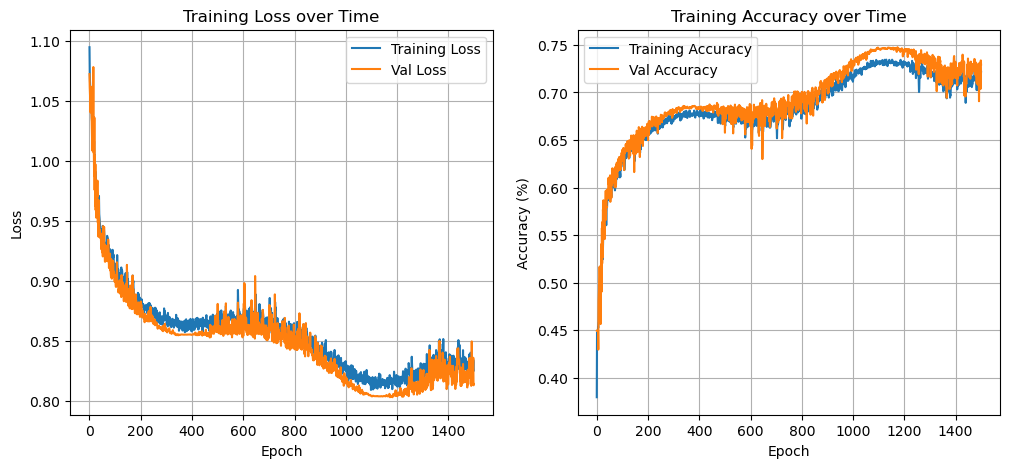

In [31]:
train_dataset = TensorDataset(torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.long))
val_dataset = TensorDataset(torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.long))
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

X_test_ = torch.tensor(test, dtype=torch.float32).to(device)

model = CNN().to(device)

# if torch.cuda.device_count() > 1:
#     print(f'Using {torch.cuda.device_count()} GPUs')
#     model = nn.DataParallel(model)

optimizer = optim.AdamW(model.parameters(), lr=4e-4)
scheduler = CosineAnnealingLR(optimizer, T_max=EPOCH)
loss_fn = nn.CrossEntropyLoss()

train_losses = []
val_losses = []
train_accs = []
val_accs = []

print('Start Training!')
loop = tqdm(range(1, EPOCH + 1), leave=True)
for epoch in loop:
    torch.cuda.empty_cache()
    model.train()
    train_loss = 0.0
    correct = 0
    total = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        out = model(X_batch)
        loss = loss_fn(out, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step()
        train_loss += loss.item()
        y_pred_train = torch.argmax(out, -1)
        correct += (y_pred_train == y_batch).sum().item()
        total += y_batch.size(0)
    train_loss /= len(train_loader)
    train_acc_score = correct / total
    
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            val_out = model(X_batch)
            val_loss += loss_fn(val_out, y_batch).item()
            y_pred = torch.argmax(val_out, -1)
            correct += (y_pred == y_batch).sum().item()
            total += y_batch.size(0)
    val_loss /= len(val_loader)
    val_acc_score = correct / total
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc_score)
    val_accs.append(val_acc_score)
    
    loop.set_postfix(loss=train_loss, val_loss=val_loss, val_acc=val_acc_score, acc=train_acc_score)

clear_output(wait=True)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Time')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Training Accuracy')
plt.plot(val_accs, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy over Time')
plt.legend()
plt.grid()

plt.show()

model.eval()
with torch.no_grad():
    test_out = model(X_test_)
    test_preds = torch.argmax(test_out, -1).cpu().detach().numpy()

In [32]:
torch.save(model, 'SuperUltraResNet_model1_moretraining.pt')

In [34]:
predict = model(test.to(device))
# predict = torch.argmax(predict, -1)

predict = torch.argmax(predict, -1).cpu().detach().numpy().astype(object)
predict = predict.astype(object)
for key, value in id2label.items():
  predict[predict==key] = value

predict = predict.reshape(4000)

df_submit = pd.read_csv('sample_submission.csv')

df_submit.loc[3:, 'nforest_type'] = predict[3:]

df_submit.to_csv('submissionSuperUltraResNet_model1_moretraining.csv', index=False)